# 5. Digital Link A 
---------------------------------------------


In [6]:
from IPython.core.display import HTML


def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Comments

This chapter discusses useful approximation results: it provides other illustrations of the CLT, shows how the exponential distribution approaches the geometric distribution, and how the Poisson distribution approaches the binomial distribution.

## 5.1 Huffman Encoding

Recall that the Huffman encoding assigns a binary string to each symbol in a prefix-free way so that the average number of bits per symbol is minimized.  Prefix-free means that one can recover the sequence of symbols uniquely from the concatenation of their codes.

The code below is from rosettacode.org.

In [7]:
import numpy as np
from heapq import heappush, heappop, heapify
from collections import defaultdict
from ipywidgets import *
from IPython.display import display
from IPython.core.pylabtools import figsize

 
def encode(symb2freq):
    """Huffman encode the given dict mapping symbols to weights"""
    heap = [[wt, [sym, ""]] for sym, wt in symb2freq.items()]
    heapify(heap)
    while len(heap) > 1:
        lo = heappop(heap)
        hi = heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heappop(heap)[1:], key=lambda p: (len(p[-1]), p))
 
#txt = "this is an example for huffman encoding"
#symb2freq = defaultdict(int)

def HUFF(txt):
    for ch in txt:
        symb2freq[ch] += 1
        # in Python 3.1+:
        # symb2freq = collections.Counter(txt)
    huff = encode(symb2freq)
    print ("Symbol\tWeight\tHuffman Code")
    for p in huff:
        print ((p[0], symb2freq[p[0]], p[1]))
    
    

text = widgets.Text(layout=Layout(width='100%'))
display(text)

print('Type an arbitrary text in the box above.  Upon "return", you will get the corresponding Huffman code.')

def handle_submit(sender):
    HUFF(txt = text.value)

text.on_submit(handle_submit)

Type an arbitrary text in the box above.  Upon "return", you will get the corresponding Huffman code.


NameError: name 'symb2freq' is not defined

## 5.2 Digital Link

Consider a digital link that operates as follows.  The input is a random string of i.i.d. symbols $X_n$ that are $B(0.5)$.  To send $X_n$, the transmitter sends the signal $2X_n - 1$.  That is, it sends $-1$ to transmit a bit $0$ and $+1$ to transmit a bit $1$. The channel adds an i.i.d. ${\cal N}(0, \sigma^2)$ noise $Z_n$ to $2X_n - 1$. 

By symmetry, the MAP of $X_n$ given $Y_n = 2X_n - 1 + Z_n$ is $R_n = 1\{Y_n > 0\}$.
Moreover, the resulting bit error rate (BER) is given by $P({\cal N}(0,\sigma^2) > 1$.

![title](Figs/Dlink.pdf)

In the code below, we simulate the link.

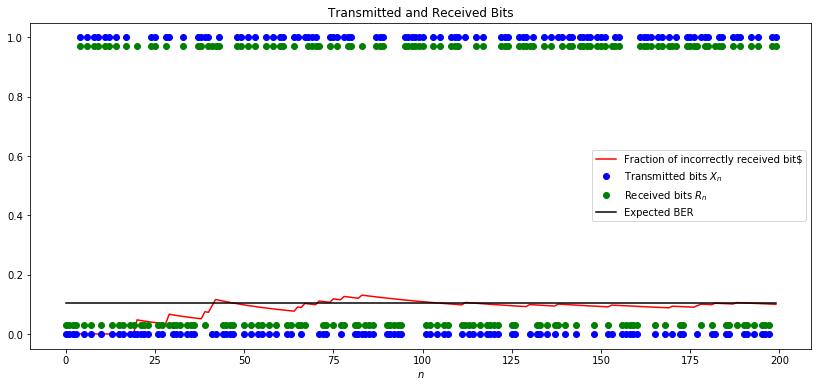

In [8]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import scipy.stats as stats

from matplotlib import pyplot as plt
figsize(14, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

def DLINK(A): 
    S = 200
    a = np.arange(0.0, S)
    x = np.arange(0.0, S)
    y = np.arange(0.0, S)
    v = np.arange(0.0, S)
    s = np.arange(0.0, S)
    u = np.arange(0.0, S)
    
    F = 1 - norm.cdf(1, 0, A)
    for i in range(0,S):
        a[i] = i
        x[i] = np.random.binomial(1,0.5)
        y[i] = 2*x[i] - 1 + np.random.normal(0,A)
        v[i] = (y[i]>0)
        u[i] = F
    s[0] = 1 - (x[i]==v[i])
    for i in range(1,S):
        s[i] = (i*s[i-1] + 1 - (v[i]==x[i]))/(i+1)
    plt.plot(a, s, color='r',label="Fraction of incorrectly received bit$") 
    plt.plot(a, x, 'bo', color='b',label="Transmitted bits $X_n$")
    plt.plot(a, 0.03 + 0.94*v, 'bo', color='g',label="Received bits $R_n$")
    plt.plot(a, u, color='black',label="Expected BER")
    plt.legend()
    plt.xlabel("$n$")
    plt.title("Transmitted and Received Bits")
V2 = widgets.FloatSlider(description='$\sigma$', min = 0.1 , max = 3, step = 0.1, value = 0.8)
z = widgets.interactive(DLINK, A=V2) 
display(z)

## 5.2 QPSK

In the previous model, the link transmits two different values: one for each bit $0$ or $1$.  Modern links use a more efficient scheme.  For instance, **quadrature phase shift keying (QPSK)** transmits $k$ bits at a time.  Each $k$-bit string is transmitted as one of $2^k$ different signals.  Each signal has the form $a_i \cos(2 \pi ft) + b_i \sin(2 \pi ft)$ where $(a_i,b_i)$ depend on the bit string.  Thus, there are $2^k$ different pairs $(a_i, b_i)$, one for each of the $2^k$ string of $k$ bits. The transmitter sends that signal for $T$ seconds.  The receiver measures the coefficients $(a, b)$ and determines which of the $k$-bit strings was transmitted.  Because of noise, when the transmitter sends a pair $(a_i, b_i)$, the receiver gets $(a', b') = (a_i + v_1, b_i + v_2)$ where $v_1$ and $v_2$ are independent ${\cal N}(0, \sigma^2)$ random variables. The receiver determines the pair $(a_j, b_j)$ that is closest to $(a', b')$.  If this pair is $(a_i, b_i)$, the receiver guesses correctly the $k$ bits that the transmitter sent.  Otherwise, the receiver makes a mistake.  The figure below illustrates the process.

![title](Figs/QPSK.pdf)

In the figure where $k = 3$, the transmitter sends the bits $000$ by choosing the values $a = 1, b = 0$.  Noise modifies these values and the receiver gets the pair $(a', b')$ indicated by the red point.  The receiver finds which of the eight pairs $(a_i, b_i)$ is closest to the red point.  In this example, this is the green pair that corresponds to the string $001$.  Thus, the receiver makes a mistake.  

The code below simulates the process. At each step, the transmitter sends one of the $K = 2^k$ pairs, with equal probabilities.  The noise perturbs that pair.  The receiver makes a mistake if it receives a pair that is closer to a point different from the one transmitted.  For the simulation, by symmetry, the transmitter always sends $(1, 0)$.  The receiver gets $(1 + v_1, v_2)$ and finds the value of $i$ that minimizes $\|(a_i, b_i) - (1 + v_1, v_2)\|^2$ where $a_i = \cos(2\pi i/K)$ and $b_i = \sin(2 \pi i/K)$ for $i = 0, 1, \ldots, K-1$.  The receiver does not make a mistake if the minimizer is $i = 0$.

To compare the error rate of different values of $k$, one has to note that the variance of the noise should be $\sigma^2/k$.  The reason is that the receiver computes the average value of the signal over the duration $T$ of the transmission of the bit string.  This duration increases in proportion to $k$.  Consequently, the average value of the noise looks like $(Z_1 + \cdots + Z_k)/k$ where the $Z_j$ are the values of the noise during each bit transmission.  If the variance of each $Z_j$ is $\sigma^2$, the variance of $(Z_1 + \cdots + Z_k)/k$ is $\sigma^2/k$.

In [9]:
k = 3
K = 2**k
e = np.arange(0.0,K)
print(np.argmin(e))


0


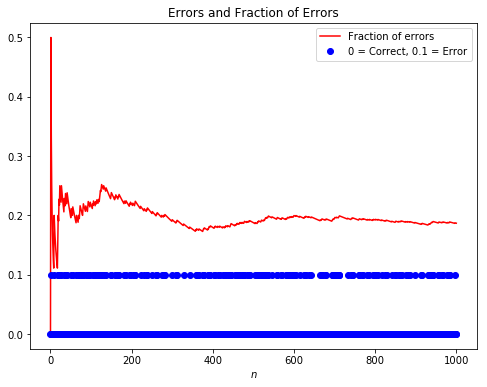

In [10]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from IPython.display import clear_output
import numpy as np
from scipy.stats import norm
from scipy.stats import binom
import scipy.stats as stats

from matplotlib import pyplot as plt
figsize(8, 6)

import scipy.stats as stats

from ipywidgets import *
from IPython.display import display

def QPSK(sig,k): 
    N = 1000
    a = np.arange(0.0, N+1)
    s = np.arange(0.0, N+1)
    c = np.arange(0.0, N+1)
    K = int(2**k)
    a1 = np.arange(0.0, K)  # x-coordinate of dots
    a2 = np.arange(0.0, K)  # y-coordinate of dots
    e = np.arange(0.0,K) # errors
    g = 2*np.pi/K
    for i in range (0,K):
        a1[i] = np.cos(i*g)
        a2[i] = np.sin(i*g)
    A = sig/(k**0.5)
    s[0] = 0
    c[0] = 0
    a[0] = 0
    for n in range(0,N):
        a[n+1] = n+1
        for i in range(0,K):
            e[i] = (1+np.random.normal(0,A) - a1[i])**2 + (np.random.normal(0,A) - a2[i])**2
        y = np.argmin(e)       
        s[n+1] = ((n+1)*s[n] + 1 - (y == 0))/(n+2)
        c[n+1] = 1 - (y == 0)
    plt.plot(a, s, color='r',label="Fraction of errors") 
    plt.plot(a, 0.1*c, 'bo', color='b',label="0 = Correct, 0.1 = Error")
    plt.legend()
    plt.xlabel("$n$")
    plt.title("Errors and Fraction of Errors")
W1 = widgets.FloatSlider(description='$\sigma$', min = 0.1, max = 3, step = 0.1, value = 0.8)
W2 = widgets.IntSlider(description='$k$', min = 1 , max = 5, step = 1, value = 2)
z = widgets.interactive(QPSK, sig=W1,k=W2) 
display(z)